# Quantify infrastructure burden

In [1]:
# import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scripts.plots_stats.get_df_ssp import get_df_ssp

In [2]:
df_ssp = get_df_ssp()
df = df_ssp.copy()
print(df.shape, df_ssp.shape)

(30544, 23) (30544, 23) (30544, 23) (30498, 23) (30498, 23) (30498, 23)
(30498, 41) (30544, 41)
Total number of cities 30498
(30498, 179) (30498, 179)


### % cities with increasing/decreasing burden

In [3]:
df[['RBUV_Burden_2050_ssp1','RBUV_Burden_2050','RBUV_Burden_2050_ssp4', 'RBUV_Burden_2100_ssp1', 'RBUV_Burden_2100', 'RBUV_Burden_2100_ssp4']].apply(pd.Series.value_counts)

,RBUV_Burden_2050_ssp1,RBUV_Burden_2050,RBUV_Burden_2050_ssp4,RBUV_Burden_2100_ssp1,RBUV_Burden_2100,RBUV_Burden_2100_ssp4
decreasingBurden,17547,15894,11970,9596,11084,3087
increasingBurden,12753,14438,18382,20722,19233,27334
noChange,198,166,146,180,181,77


In [4]:
(df[['RBUV_Burden_2050_ssp1','RBUV_Burden_2050','RBUV_Burden_2050_ssp4', 'RBUV_Burden_2100_ssp1', 'RBUV_Burden_2100', 'RBUV_Burden_2100_ssp4']].apply(pd.Series.value_counts)*100/df.shape[0]).round()

,RBUV_Burden_2050_ssp1,RBUV_Burden_2050,RBUV_Burden_2050_ssp4,RBUV_Burden_2100_ssp1,RBUV_Burden_2100,RBUV_Burden_2100_ssp4
decreasingBurden,58.0,52.0,39.0,31.0,36.0,10.0
increasingBurden,42.0,47.0,60.0,68.0,63.0,90.0
noChange,1.0,1.0,0.0,1.0,1.0,0.0


In [5]:
df[['RL_Burden_2050_ssp1','RL_Burden_2050','RL_Burden_2050_ssp4', 'RL_Burden_2100_ssp1', 'RL_Burden_2100', 'RL_Burden_2100_ssp4']].apply(pd.Series.value_counts)

,RL_Burden_2050_ssp1,RL_Burden_2050,RL_Burden_2050_ssp4,RL_Burden_2100_ssp1,RL_Burden_2100,RL_Burden_2100_ssp4
decreasingBurden,16823,15117,11132,10577,10964,3737
increasingBurden,10827,12490,16448,17153,16828,23875
noChange,2848,2891,2918,2768,2706,2886


In [6]:
(df[['RL_Burden_2050_ssp1','RL_Burden_2050','RL_Burden_2050_ssp4', 'RL_Burden_2100_ssp1', 'RL_Burden_2100', 'RL_Burden_2100_ssp4']].apply(pd.Series.value_counts)*100/df.shape[0]).round()

,RL_Burden_2050_ssp1,RL_Burden_2050,RL_Burden_2050_ssp4,RL_Burden_2100_ssp1,RL_Burden_2100,RL_Burden_2100_ssp4
decreasingBurden,55.0,50.0,37.0,35.0,36.0,12.0
increasingBurden,36.0,41.0,54.0,56.0,55.0,78.0
noChange,9.0,9.0,10.0,9.0,9.0,9.0


In [7]:
df[(df['RBUV_Burden_2050']=='increasingBurden') & (df['RL_Burden_2050']=='increasingBurden')].shape[0]/df.shape[0], df[(df['RBUV_Burden_2100']=='increasingBurden') & (df['RL_Burden_2100']=='increasingBurden')].shape[0]/df.shape[0]

(0.4095350514787855, 0.55177388681225)

### Constantly decreasing burden

In [8]:
condition = (df_ssp['volume_m3_perCap_2020_ssp2'] > df_ssp['volume_m3_perCap_2030_ssp2']) & (df_ssp['volume_m3_perCap_2030_ssp2'] > df_ssp['volume_m3_perCap_2040_ssp2']) & \
            (df_ssp['volume_m3_perCap_2040_ssp2'] > df_ssp['volume_m3_perCap_2050_ssp2']) & (df_ssp['volume_m3_perCap_2050_ssp2'] > df_ssp['volume_m3_perCap_2060_ssp2']) & \
            (df_ssp['volume_m3_perCap_2060_ssp2'] > df_ssp['volume_m3_perCap_2070_ssp2']) & (df_ssp['volume_m3_perCap_2070_ssp2'] > df_ssp['volume_m3_perCap_2080_ssp2']) & \
            (df_ssp['volume_m3_perCap_2080_ssp2'] > df_ssp['volume_m3_perCap_2090_ssp2']) & (df_ssp['volume_m3_perCap_2090_ssp2'] > df_ssp['volume_m3_perCap_2100_ssp2'])
print(f"cities that face constantly decreasing burden for RBUV {np.round(df_ssp[condition].shape[0]*100/df_ssp.shape[0], 0)}")

condition = (df_ssp['length_m_perCap_2020_ssp2'] > df_ssp['length_m_perCap_2030_ssp2']) & (df_ssp['length_m_perCap_2030_ssp2'] > df_ssp['length_m_perCap_2040_ssp2']) & \
            (df_ssp['length_m_perCap_2040_ssp2'] > df_ssp['length_m_perCap_2050_ssp2']) & (df_ssp['length_m_perCap_2050_ssp2'] > df_ssp['length_m_perCap_2060_ssp2']) & \
            (df_ssp['length_m_perCap_2060_ssp2'] > df_ssp['length_m_perCap_2070_ssp2']) & (df_ssp['length_m_perCap_2070_ssp2'] > df_ssp['length_m_perCap_2080_ssp2']) & \
            (df_ssp['length_m_perCap_2080_ssp2'] > df_ssp['length_m_perCap_2090_ssp2']) & (df_ssp['length_m_perCap_2090_ssp2'] > df_ssp['length_m_perCap_2100_ssp2'])
print(f"cities that face constantly decreasing burden for RL {np.round(df_ssp[condition].shape[0]*100/df_ssp.shape[0], 0)}")

cities that face constantly decreasing burden for RBUV 25.0
cities that face constantly decreasing burden for RL 25.0


In [9]:
condition = (df_ssp['volume_m3_perCap_2020_ssp1'] > df_ssp['volume_m3_perCap_2030_ssp1']) & (df_ssp['volume_m3_perCap_2030_ssp1'] > df_ssp['volume_m3_perCap_2040_ssp1']) & \
            (df_ssp['volume_m3_perCap_2040_ssp1'] > df_ssp['volume_m3_perCap_2050_ssp1']) & (df_ssp['volume_m3_perCap_2050_ssp1'] > df_ssp['volume_m3_perCap_2060_ssp1']) & \
            (df_ssp['volume_m3_perCap_2060_ssp1'] > df_ssp['volume_m3_perCap_2070_ssp1']) & (df_ssp['volume_m3_perCap_2070_ssp1'] > df_ssp['volume_m3_perCap_2080_ssp1']) & \
            (df_ssp['volume_m3_perCap_2080_ssp1'] > df_ssp['volume_m3_perCap_2090_ssp1']) & (df_ssp['volume_m3_perCap_2090_ssp1'] > df_ssp['volume_m3_perCap_2100_ssp1'])
print(f"cities that face constantly decreasing burden for RBUV {np.round(df_ssp[condition].shape[0]*100/df_ssp.shape[0], 0)}")

condition = (df_ssp['length_m_perCap_2020_ssp1'] > df_ssp['length_m_perCap_2030_ssp1']) & (df_ssp['length_m_perCap_2030_ssp1'] > df_ssp['length_m_perCap_2040_ssp1']) & \
            (df_ssp['length_m_perCap_2040_ssp1'] > df_ssp['length_m_perCap_2050_ssp1']) & (df_ssp['length_m_perCap_2050_ssp1'] > df_ssp['length_m_perCap_2060_ssp1']) & \
            (df_ssp['length_m_perCap_2060_ssp1'] > df_ssp['length_m_perCap_2070_ssp1']) & (df_ssp['length_m_perCap_2070_ssp1'] > df_ssp['length_m_perCap_2080_ssp1']) & \
            (df_ssp['length_m_perCap_2080_ssp1'] > df_ssp['length_m_perCap_2090_ssp1']) & (df_ssp['length_m_perCap_2090_ssp1'] > df_ssp['length_m_perCap_2100_ssp1'])
print(f"cities that face constantly decreasing burden for RL {np.round(df_ssp[condition].shape[0]*100/df_ssp.shape[0], 0)}")

cities that face constantly decreasing burden for RBUV 14.0
cities that face constantly decreasing burden for RL 14.0


In [10]:
condition = (df_ssp['volume_m3_perCap_2020_ssp4'] > df_ssp['volume_m3_perCap_2030_ssp4']) & (df_ssp['volume_m3_perCap_2030_ssp4'] > df_ssp['volume_m3_perCap_2040_ssp4']) & \
            (df_ssp['volume_m3_perCap_2040_ssp4'] > df_ssp['volume_m3_perCap_2050_ssp4']) & (df_ssp['volume_m3_perCap_2050_ssp4'] > df_ssp['volume_m3_perCap_2060_ssp4']) & \
            (df_ssp['volume_m3_perCap_2060_ssp4'] > df_ssp['volume_m3_perCap_2070_ssp4']) & (df_ssp['volume_m3_perCap_2070_ssp4'] > df_ssp['volume_m3_perCap_2080_ssp4']) & \
            (df_ssp['volume_m3_perCap_2080_ssp4'] > df_ssp['volume_m3_perCap_2090_ssp4']) & (df_ssp['volume_m3_perCap_2090_ssp4'] > df_ssp['volume_m3_perCap_2100_ssp4'])
print(f"cities that face constantly decreasing burden for RBUV {np.round(df_ssp[condition].shape[0]*100/df_ssp.shape[0], 0)}")

condition = (df_ssp['length_m_perCap_2020_ssp4'] > df_ssp['length_m_perCap_2030_ssp4']) & (df_ssp['length_m_perCap_2030_ssp4'] > df_ssp['length_m_perCap_2040_ssp4']) & \
            (df_ssp['length_m_perCap_2040_ssp4'] > df_ssp['length_m_perCap_2050_ssp4']) & (df_ssp['length_m_perCap_2050_ssp4'] > df_ssp['length_m_perCap_2060_ssp4']) & \
            (df_ssp['length_m_perCap_2060_ssp4'] > df_ssp['length_m_perCap_2070_ssp4']) & (df_ssp['length_m_perCap_2070_ssp4'] > df_ssp['length_m_perCap_2080_ssp4']) & \
            (df_ssp['length_m_perCap_2080_ssp4'] > df_ssp['length_m_perCap_2090_ssp4']) & (df_ssp['length_m_perCap_2090_ssp4'] > df_ssp['length_m_perCap_2100_ssp4'])
print(f"cities that face constantly decreasing burden for RL {np.round(df_ssp[condition].shape[0]*100/df_ssp.shape[0], 0)}")

cities that face constantly decreasing burden for RBUV 3.0
cities that face constantly decreasing burden for RL 4.0


In [11]:
df_ssp.filter(regex='volume').columns
print("Percent cities with decreasing built volumes")

column_nmaes1 = ['volume_m3_perCap_2020_ssp2','volume_m3_perCap_2030_ssp2', 'volume_m3_perCap_2040_ssp2','volume_m3_perCap_2050_ssp2', 'volume_m3_perCap_2060_ssp2',
                'volume_m3_perCap_2070_ssp2', 'volume_m3_perCap_2080_ssp2', 'volume_m3_perCap_2090_ssp2']
column_nmaes2 = ['volume_m3_perCap_2030_ssp2', 'volume_m3_perCap_2040_ssp2','volume_m3_perCap_2050_ssp2', 'volume_m3_perCap_2060_ssp2',
                'volume_m3_perCap_2070_ssp2', 'volume_m3_perCap_2080_ssp2', 'volume_m3_perCap_2090_ssp2', 'volume_m3_perCap_2100_ssp2']
for col1, col2 in zip(column_nmaes1, column_nmaes2):
    print(np.round(df_ssp[df_ssp[col2] < df_ssp[col1]].shape[0]*100/df_ssp.shape[0],2))

print("Percent cities with decreasing roadways")

column_nmaes1 = ['length_m_perCap_2020_ssp2','length_m_perCap_2030_ssp2', 'length_m_perCap_2040_ssp2','length_m_perCap_2050_ssp2', 
                 'length_m_perCap_2060_ssp2','length_m_perCap_2070_ssp2', 'length_m_perCap_2080_ssp2', 'length_m_perCap_2090_ssp2']
column_nmaes2 = ['length_m_perCap_2030_ssp2', 'length_m_perCap_2040_ssp2','length_m_perCap_2050_ssp2', 'length_m_perCap_2060_ssp2',
                 'length_m_perCap_2070_ssp2', 'length_m_perCap_2080_ssp2', 'length_m_perCap_2090_ssp2', 'length_m_perCap_2100_ssp2']
for col1, col2 in zip(column_nmaes1, column_nmaes2):
    print(np.round(df_ssp[df_ssp[col2] < df_ssp[col1]].shape[0]*100/df_ssp.shape[0],2))

Percent cities with decreasing built volumes
65.71
52.59
47.41
49.89
48.29
42.33
34.2
27.16
Percent cities with decreasing roadways
65.79
52.75
47.56
50.09
48.51
42.56
34.31
27.29


In [12]:
# df_ssp.filter(regex='volume').columns
# print("Percent cities with decreasing built volumes")

# column_nmaes1 = ['volume_m3_perCap_2020_ssp1','volume_m3_perCap_2030_ssp1', 'volume_m3_perCap_2040_ssp1','volume_m3_perCap_2050_ssp1', 'volume_m3_perCap_2060_ssp1',
#                 'volume_m3_perCap_2070_ssp1', 'volume_m3_perCap_2080_ssp1', 'volume_m3_perCap_2090_ssp1']
# column_nmaes2 = ['volume_m3_perCap_2030_ssp1', 'volume_m3_perCap_2040_ssp1','volume_m3_perCap_2050_ssp1', 'volume_m3_perCap_2060_ssp1',
#                 'volume_m3_perCap_2070_ssp1', 'volume_m3_perCap_2080_ssp1', 'volume_m3_perCap_2090_ssp1', 'volume_m3_perCap_2100_ssp1']
# for col1, col2 in zip(column_nmaes1, column_nmaes2):
#     print(np.round(df_ssp[df_ssp[col2] < df_ssp[col1]].shape[0]*100/df_ssp.shape[0],2))

# print("Percent cities with decreasing roadways")

# column_nmaes1 = ['length_m_perCap_2020_ssp1','length_m_perCap_2030_ssp1', 'length_m_perCap_2040_ssp1','length_m_perCap_2050_ssp1', 
#                  'length_m_perCap_2060_ssp1','length_m_perCap_2070_ssp1', 'length_m_perCap_2080_ssp1', 'length_m_perCap_2090_ssp1']
# column_nmaes2 = ['length_m_perCap_2030_ssp1', 'length_m_perCap_2040_ssp1','length_m_perCap_2050_ssp1', 'length_m_perCap_2060_ssp1',
#                  'length_m_perCap_2070_ssp1', 'length_m_perCap_2080_ssp1', 'length_m_perCap_2090_ssp1', 'length_m_perCap_2100_ssp1']
# for col1, col2 in zip(column_nmaes1, column_nmaes2):
#     print(np.round(df_ssp[df_ssp[col2] < df_ssp[col1]].shape[0]*100/df_ssp.shape[0],2))

### Addandoned RBUV / RL
### Consider 2% and 8% decadal demolition for housing stock

In [57]:
def additional_infrastructure_in_increasing_burden_cities(df, pop0, pop1, pop2, perCap_infra0, perCap_infra1, perCap_infra2, burden_colt1, burden_colt2, infra_type):

    df['total_infra0'] = df[pop0] * df[perCap_infra0]
    df['total_infra1'] = df[pop1] * df[perCap_infra1]
    df['total_infra2'] = df[pop2] * df[perCap_infra2]

    # total roadway length in 2020 for increasing burden cities
    increasing_burden_cities_2050_total_infra_2020_ssp2 = df[(df[burden_colt1] == 'increasingBurden')]['total_infra0'].sum()
    # print(increasing_burden_cities_2050_total_infra_2020_ssp2)
    # total roadway length in 2050 for increasing burden cities
    increasing_burden_cities_2050_total_infra_2050_ssp2 = df[(df[burden_colt1] == 'increasingBurden')]['total_infra1'].sum()
    # print(increasing_burden_cities_2050_total_infra_2050_ssp2)

    per_cap_2020_increasing_burden_cities_2050 = increasing_burden_cities_2050_total_infra_2020_ssp2 / df[(df[burden_colt1] == 'increasingBurden')][pop0].sum()
    per_cap_2050_increasing_burden_cities_2050 = increasing_burden_cities_2050_total_infra_2050_ssp2 / df[(df[burden_colt1] == 'increasingBurden')][pop1].sum().round(0)
    # print(per_cap_2020_increasing_burden_cities_2050, per_cap_2050_increasing_burden_cities_2050)
    # print(df[(df[burden_colt1] == 'increasingBurden')][pop0].sum(), df[(df[burden_colt1] == 'increasingBurden')][pop1].sum().round(0))

    change_per_cap_infra_increasing_burden_cities_2050 = per_cap_2050_increasing_burden_cities_2050 - per_cap_2020_increasing_burden_cities_2050
    # print(change_per_cap_infra_increasing_burden_cities_2050)
    # print(f"per capita lane kms in 2020 for increasing burden cities {change_per_cap_lane_km_increasing_burden_cities_2050}")
    # total roadway length that will be burden in 2050 = change_per_cap_lane_km_increasing_burden_cities_2050 * 2050 population
    added_infrastructure_in_2050 = change_per_cap_infra_increasing_burden_cities_2050 * df[(df[burden_colt1] == 'increasingBurden')][pop1].sum().round(0)
    # print(f"added infrastruture from 2020 to 2050 {added_infrastructure_in_2050}")


    # total roadway length in 2050 for increasing burden cities
    increasing_burden_cities_2100_total_infra_2050_ssp2 = df[(df[burden_colt2] == 'increasingBurden')]['total_infra1'].sum()
    # total roadway length in 2100 for increasing burden cities
    increasing_burden_cities_2100_total_infra_2100_ssp2 = df[(df[burden_colt2] == 'increasingBurden')]['total_infra2'].sum()
    per_cap_2050_increasing_burden_cities_2100 = increasing_burden_cities_2100_total_infra_2050_ssp2 / df[(df[burden_colt2] == 'increasingBurden')][pop1].sum().round(0)
    per_cap_2100_increasing_burden_cities_2100 = increasing_burden_cities_2100_total_infra_2100_ssp2 / df[(df[burden_colt2] == 'increasingBurden')][pop2].sum().round(0)
    change_per_cap_infra_increasing_burden_cities_2100 = per_cap_2100_increasing_burden_cities_2100 - per_cap_2050_increasing_burden_cities_2100
    # print(f"per capita lane kms in 2050 for increasing burden cities {change_per_cap_lane_km_increasing_burden_cities_2100}")
    # total roadway length that will be burden in 2100 = change_per_cap_lane_km_increasing_burden_cities_2100 * 2100 population
    added_infrastructure_in_2100 = change_per_cap_infra_increasing_burden_cities_2100*df[(df[burden_colt2] == 'increasingBurden')][pop2].sum().round(0)
    # print(f"added infrastruture from 2050 to 2100 {added_infrastructure_in_2100}")


    if infra_type == 'RBUV':
        print('Additional housing units in cities with an increasing burden')
        print("====================================================================================")
        median_HU_volume = 1663 # in cubic meter Median housing unit volume in cubic meters from ACS Table S2504
        
        added_units_2020_2050 = np.round(added_infrastructure_in_2050/ median_HU_volume)
        print(f"Added housing units in 2050, {added_units_2020_2050}")
        print("Remaining abandoned units after 2% and 8% decadal demolition in 2050")
        print(np.round(added_units_2020_2050* (1-0.02)**3), np.round(added_units_2020_2050*(1-0.08)**3))
        # print('\n')
        added_units_2050_2100 = np.round(added_infrastructure_in_2100/ median_HU_volume)
        print(f"Added housing units in 2100, {added_units_2050_2100}")        
        print("Remaining abandoned units after 2% and 8% decadal demolition in 2100")
        print(np.round(added_units_2050_2100*(1-0.02)**5), np.round(added_units_2050_2100*(1-0.08)**5))
        print("====================================================================================\n")

    elif infra_type == 'RL':
        print('Additional RL in cities with an increasing burden in kilometers')
        print("====================================================================================")
        print(f"By 2050 local lane that will be burden {(added_infrastructure_in_2050/1000).round(2)} km")
        print(f"By 2100 local lane that will be burden {(added_infrastructure_in_2100/1000).round(2)} km")
        print("\n")
    else:
        print("Check the conditions / parameters.")


In [56]:
x = 74.82*25555993
print(x)
x/1663, (x/1663)*(1-.02)**3

1912099396.2599998


(1149789.1739386648, 1082172.3721976797)

### Excluding cities over 10000 per cap volume ==== For cities with an increasing burden

In [58]:
df_10000 = df_ssp[df_ssp['volume_m3_perCap_2020_ssp2'] < 10000].copy()
print(df.shape, df_ssp.shape)
print("SSP 1 ==============")
additional_infrastructure_in_increasing_burden_cities(df_10000, 'CensusPop_20', 'ssp12050', 'ssp12100', 'volume_m3_perCap_2020_ssp1', 'volume_m3_perCap_2050_ssp1', 'volume_m3_perCap_2100_ssp1', 'RBUV_Burden_2050_ssp1', 'RBUV_Burden_2100_ssp1', infra_type='RBUV')
print("SSP 2 ==============")
additional_infrastructure_in_increasing_burden_cities(df_10000, 'CensusPop_20', 'ssp22050', 'ssp22100', 'volume_m3_perCap_2020_ssp2', 'volume_m3_perCap_2050_ssp2', 'volume_m3_perCap_2100_ssp2', 'RBUV_Burden_2050', 'RBUV_Burden_2100', infra_type='RBUV')
print("SSP 4 ==============")
additional_infrastructure_in_increasing_burden_cities(df_10000, 'CensusPop_20', 'ssp42050', 'ssp42100', 'volume_m3_perCap_2020_ssp4', 'volume_m3_perCap_2050_ssp4', 'volume_m3_perCap_2100_ssp4', 'RBUV_Burden_2050_ssp4', 'RBUV_Burden_2100_ssp4', infra_type='RBUV')

(30498, 182) (30498, 179)
SSP 1 ==============
Additional housing units in cities with an increasing burden
Added housing units in 2050, 938246.0
Remaining abandoned units after 2% and 8% decadal demolition in 2050
883070.0 730601.0
Added housing units in 2100, 3613731.0
Remaining abandoned units after 2% and 8% decadal demolition in 2100
3266527.0 2381743.0

SSP 2 ==============
Additional housing units in cities with an increasing burden
Added housing units in 2050, 1149747.0
Remaining abandoned units after 2% and 8% decadal demolition in 2050
1082133.0 895294.0
Added housing units in 2100, 3070966.0
Remaining abandoned units after 2% and 8% decadal demolition in 2100
2775910.0 2024017.0

SSP 4 ==============
Additional housing units in cities with an increasing burden
Added housing units in 2050, 2042103.0
Remaining abandoned units after 2% and 8% decadal demolition in 2050
1922011.0 1590161.0
Added housing units in 2100, 11215328.0
Remaining abandoned units after 2% and 8% decadal 

In [15]:
min([883070.0, 730601.0, 1082133.0, 895294.0, 1922011.0, 1590161.0]), min([3266527.0, 2381743.0, 2775910.0, 2024017.0, 10137768.0, 7391815.0]), \
max([883070.0, 730601.0, 1082133.0, 895294.0, 1922011.0, 1590161.0]), max([3266527.0, 2381743.0, 2775910.0, 2024017.0, 10137768.0, 7391815.0])

(730601.0, 2024017.0, 1922011.0, 10137768.0)

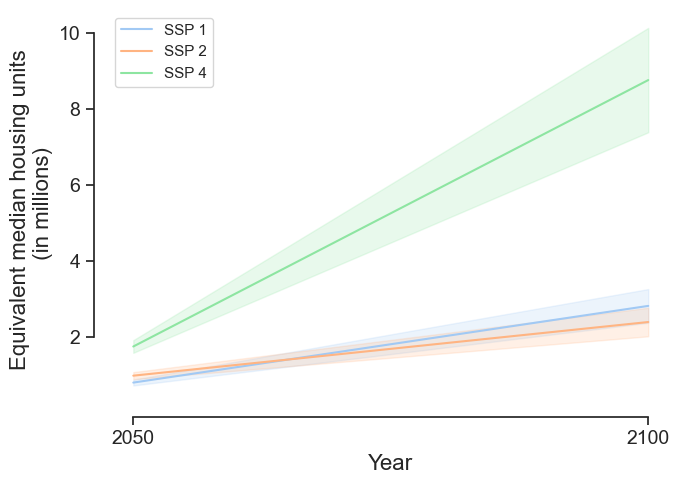

In [60]:
# Seaborn theme
sns.set_theme(style="ticks", palette="pastel")

abandoned_units = [883070.0, 730601.0, 1082133.0, 895294.0, 1922011.0, 1590161.0, 3266527.0, 2381743.0, 2775910.0, 2024017.0, 10137768.0, 7391815.0 ]
abandoned_units_in_millions = [x / 1000000 for x in abandoned_units]
# Sample Data
df_buildings_scenarios = pd.DataFrame(
    {'year': ['2050','2050','2050','2050', '2050','2050','2100','2100','2100','2100', '2100','2100'],
     'units': abandoned_units_in_millions,
     'scenarios': ['SSP 1', 'SSP 1', 'SSP 2', 'SSP 2','SSP 4', 'SSP 4', 'SSP 1', 'SSP 1','SSP 2', 'SSP 2', 'SSP 4', 'SSP 4'],
     'Demolition rate':['2%', '8%', '2%', '8%','2%', '8%', '2%', '8%', '2%', '8%', '2%', '8%',]
    })

# Plot setup
fig, ax = plt.subplots(figsize=(7, 5))
sns.lineplot(data=df_buildings_scenarios , x="year", y="units", hue="scenarios")
# Clean styling
sns.despine(offset=10, trim=True)
# ax.set_title(r'2~8% demolition rate/decade', fontsize=12)
ax.set_xlabel('Year', fontdict={'fontsize':16})
ax.set_ylabel('Equivalent median housing units \n (in millions)', fontdict={'fontsize':16})
ax.legend()
plt.tick_params(axis='both', labelsize=14)
plt.tight_layout()
plt.show()

In [61]:
print('Added RL from 2020 to 2050 in cities with an increasing burden in kilometers ')
print("====================================================================================\n")
print("SSP 1 ==============")
# Added RL from 2020 to 2050 in creasing with an increasing burden for SSP1
additional_infrastructure_in_increasing_burden_cities(df, 'CensusPop_20', 'ssp12050', 'ssp12100', 'length_m_perCap_2020_ssp1', 'length_m_perCap_2050_ssp1', 'length_m_perCap_2100_ssp1','RL_Burden_2050_ssp1', 'RL_Burden_2100_ssp1', infra_type='RL')
print("SSP 2 ==============")
additional_infrastructure_in_increasing_burden_cities(df, 'CensusPop_20', 'ssp22050', 'ssp22100', 'length_m_perCap_2020_ssp2', 'length_m_perCap_2050_ssp2', 'length_m_perCap_2100_ssp2', 'RL_Burden_2050', 'RL_Burden_2100', infra_type='RL')
print("SSP 4 ==============")
# Added RL from 2020 to 2050 in creasing with an increasing burden for SSP4
additional_infrastructure_in_increasing_burden_cities(df, 'CensusPop_20', 'ssp42050', 'ssp42100', 'length_m_perCap_2020_ssp4', 'length_m_perCap_2050_ssp4', 'length_m_perCap_2100_ssp4', 'RL_Burden_2050_ssp4', 'RL_Burden_2100_ssp4', infra_type='RL')

Added RL from 2020 to 2050 in cities with an increasing burden in kilometers 

SSP 1 ==============
Additional RL in cities with an increasing burden in kilometers
By 2050 local lane that will be burden 47302.14 km
By 2100 local lane that will be burden 140749.84 km


SSP 2 ==============
Additional RL in cities with an increasing burden in kilometers
By 2050 local lane that will be burden 57357.57 km
By 2100 local lane that will be burden 134588.66 km


SSP 4 ==============
Additional RL in cities with an increasing burden in kilometers
By 2050 local lane that will be burden 95553.96 km
By 2100 local lane that will be burden 290245.93 km




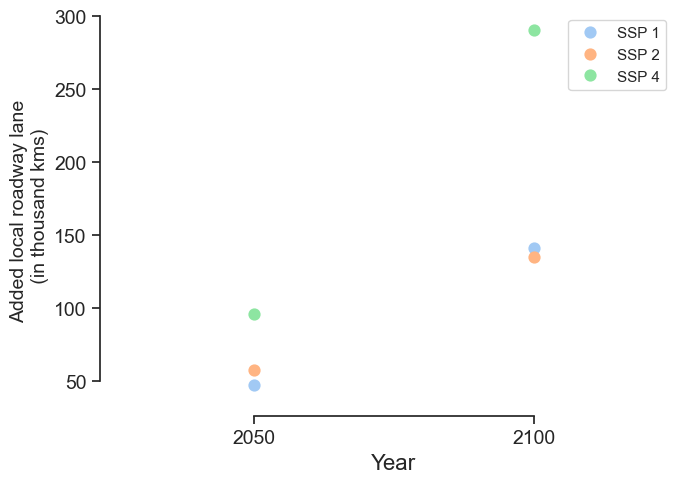

In [62]:
# Apply Seaborn theme
sns.set_theme(style="ticks", palette="pastel")

df_roadways_scenarios = pd.DataFrame(
    {'year': ['2050','2100','2050','2100', '2050','2100'],
     'units': [47.302, 140.750, 57.358, 134.589, 95.554, 290.246],
     'scenarios': ['SSP 1', 'SSP 1', 'SSP 2', 'SSP 2','SSP 4', 'SSP 4'],
    })

# Plot setup
fig, ax = plt.subplots(figsize=(7, 5))
sns.pointplot(data=df_roadways_scenarios , x="year", y="units", hue="scenarios",
              linestyle="none")

# Clean styling
sns.despine(offset=10, trim=True)
# ax.set_title(r'Total added lane kilometers with sampled $\beta$', fontsize=12)
ax.set_xlabel('Year', fontdict={'fontsize':16})
ax.set_ylabel("Added local roadway lane \n (in thousand kms)", fontdict={'fontsize':14})
ax.legend()
plt.tick_params(axis='both', labelsize=14)
plt.tight_layout()
plt.show()